In [1]:
# Dependencies
import requests
# from config import api_key
from pprint import pprint
# Save config information.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import openpyxl


In [2]:
## Read in Files
hpi_inc_comb = pd.read_csv('medsp_medinc_casesch.csv')

### Median Income and Median House Sales Price

In [3]:
hpi_inc_comb = hpi_inc_comb.rename(columns = {'MEHOINUSA646N_NBD19870101':'Median Household Income Index',
                                              'MEHOINUSA646N':'Median Household Income',
                                              'CSUSHPINSA_NBD19870101':'Case Schiller Index',
                                             'MSPUS_NBD19870101':'Median Home Sale Price Index'})

In [4]:
hpi_inc_comb.drop(hpi_inc_comb[hpi_inc_comb['DATE'] == '2022-01-01'].index, inplace=True)
hpi_inc_comb['DATE'] = hpi_inc_comb['DATE'].astype('datetime64[D]')
hpi_inc_comb['Median Household Income Index'] = hpi_inc_comb['Median Household Income Index'].astype(float)
hpi_inc_comb['Median Household Income'] = hpi_inc_comb['Median Household Income'].astype(float)
hpi_inc_comb.head()

,DATE,Median Household Income Index,Median Household Income,Case Schiller Index,Median Home Sale Price Index
0,1987-01-01,100.00000,26061.0,100.00000,100.00000
1,1988-01-01,104.46644,27225.0,107.37059,107.18720
2,1989-01-01,110.91670,28906.0,113.96065,115.01910
3,1990-01-01,114.89582,29943.0,116.12178,116.80993
4,1991-01-01,115.59802,30126.0,114.59039,114.58930


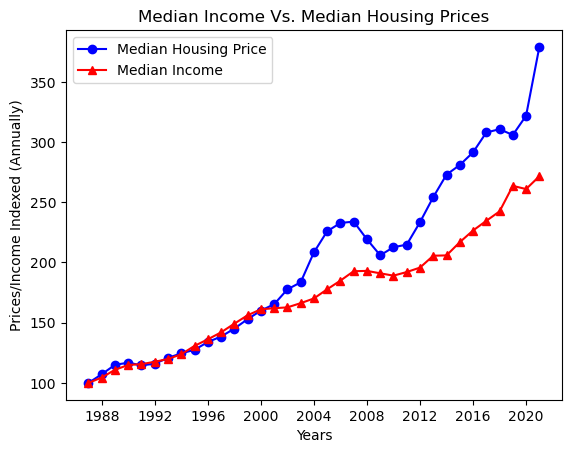

In [5]:
x_axis = hpi_inc_comb['DATE']
med = hpi_inc_comb['Median Household Income Index']
hpi = hpi_inc_comb['Median Home Sale Price Index']
plt.show()
hpi_handle, = plt.plot(x_axis, hpi, marker ='o', color='blue', label="Median Housing Price")
# Each point on the cosine chart is marked by a red triangle
med_handle, = plt.plot(x_axis, med, marker='^', color='red', label="Median Income")
plt.title("Median Income Vs. Median Housing Prices")
plt.xlabel("Years")
plt.ylabel("Prices/Income Indexed (Annually)")
plt.legend(handles=[hpi_handle, med_handle], loc="best")
plt.savefig('Med_Inc_Med_HPI.jpg')
plt.show()

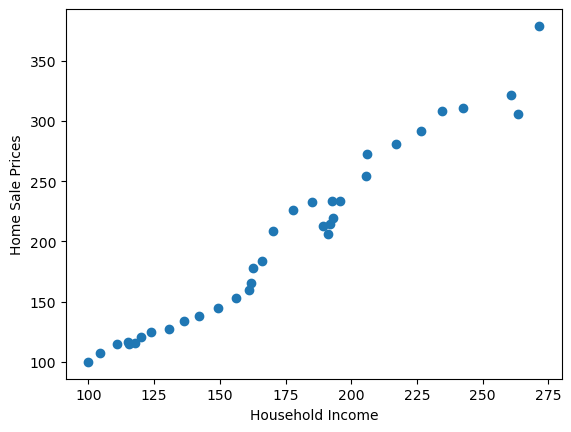

In [6]:
plt.scatter(hpi_inc_comb['Median Household Income Index'],hpi_inc_comb['Median Home Sale Price Index'])
plt.xlabel('Household Income')
plt.ylabel('Home Sale Prices')
plt.show()

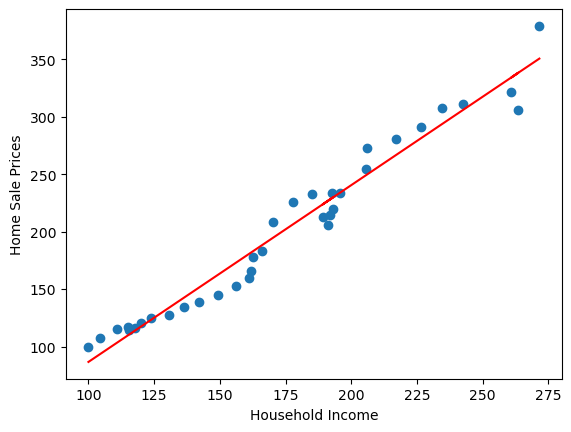

In [7]:
correlation = st.pearsonr(hpi_inc_comb['Median Household Income Index'],hpi_inc_comb['Median Home Sale Price Index'])
plt.scatter(hpi_inc_comb['Median Household Income Index'],hpi_inc_comb['Median Home Sale Price Index'])
plt.xlabel('Household Income')
plt.ylabel('Home Sale Prices')
(slope, intercept, rvalue, pvalue, stderr) = linregress(hpi_inc_comb['Median Household Income Index'],hpi_inc_comb['Median Home Sale Price Index'])
regress_values = hpi_inc_comb['Median Household Income Index'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(hpi_inc_comb['Median Household Income Index'],regress_values,"r-")
plt.show()

In [8]:
correlation

PearsonRResult(statistic=0.9811834941440882, pvalue=3.7697690153741353e-25)

In [9]:
line_eq

'y = 1.54x + -67.22'

### CPI Deflator

In [10]:
deflator = pd.read_csv('cpi_data.csv')
deflator_dj = deflator.copy()

In [11]:
deflator['Year'] =  pd.to_datetime(deflator['Year'], format='%Y')
deflator.rename(columns = {'Annual':'CPI', 'Year':'DATE'}, inplace = True)
deflated_inc = hpi_inc_comb.merge(deflator, on = 'DATE',how = 'left')
deflated_inc.head()

,DATE,Median Household Income Index,Median Household Income,Case Schiller Index,Median Home Sale Price Index,CPI
0,1987-01-01,100.00000,26061.0,100.00000,100.00000,113.6
1,1988-01-01,104.46644,27225.0,107.37059,107.18720,118.3
2,1989-01-01,110.91670,28906.0,113.96065,115.01910,124.0
3,1990-01-01,114.89582,29943.0,116.12178,116.80993,130.7
4,1991-01-01,115.59802,30126.0,114.59039,114.58930,136.2


In [12]:
deflated_inc['CPI_deflator'] = (((deflated_inc['CPI']/ deflated_inc['CPI'][0])-1)*100)+100
# deflated_inc['CPI_deflator'] = deflated_inc['CPI'].pct_change(periods = 1)+1
# deflated_inc.loc[0,'CPI_deflator'] = 1
deflated_inc.head()
deflated_inc['Median Home Sale Price Index_deflated'] = deflated_inc['Median Home Sale Price Index'] / deflated_inc['CPI_deflator']
deflated_inc['Median Household Income Index_deflated'] = deflated_inc['Median Household Income Index'] / deflated_inc['CPI_deflator']

In [13]:
deflated_inc.to_excel('inflation.xlsx')

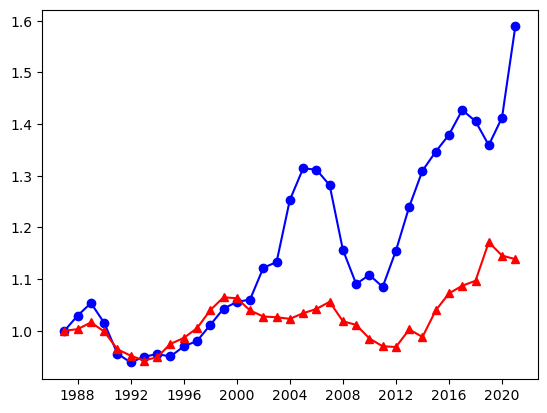

In [14]:
x_axis = deflated_inc['DATE']
hpi = deflated_inc['Median Home Sale Price Index_deflated']
med = deflated_inc['Median Household Income Index_deflated']
plt.show()
hpi_handle, = plt.plot(x_axis, hpi, marker ='o', color='blue', label="HPI")
# Each point on the cosine chart is marked by a red triangle
med_handle, = plt.plot(x_axis, med, marker='^', color='red', label="INC")
plt.show()

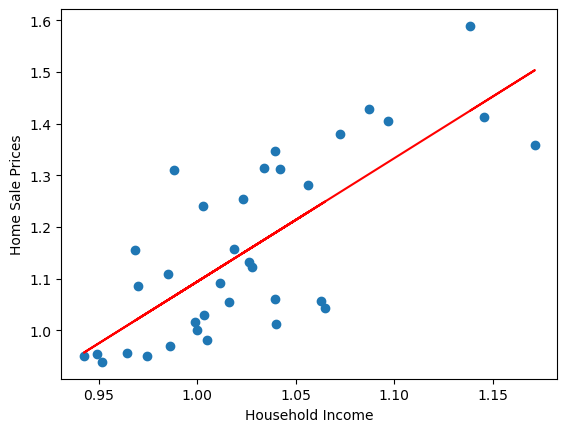

In [15]:
correlation = st.pearsonr(deflated_inc['Median Household Income Index_deflated'],deflated_inc['Median Home Sale Price Index_deflated'])
plt.scatter(deflated_inc['Median Household Income Index_deflated'],deflated_inc['Median Home Sale Price Index_deflated'])
plt.xlabel('Household Income')
plt.ylabel('Home Sale Prices')
(slope, intercept, rvalue, pvalue, stderr) = linregress(deflated_inc['Median Household Income Index_deflated'],deflated_inc['Median Home Sale Price Index_deflated'])
regress_values = deflated_inc['Median Household Income Index_deflated'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(deflated_inc['Median Household Income Index_deflated'],regress_values,"r-")
plt.show()

In [16]:
correlation

PearsonRResult(statistic=0.7522583744568648, pvalue=1.880644151374282e-07)

### Dow Jones vs Housing Prices

In [19]:
dj = pd.read_csv('dowjones_mth.csv')
dj.sort_values('Date').head()
dj['Adj Close**'] =dj['Adj Close**'].map(lambda x: float(x.replace(",", "")))
dj['Date'] = dj['Date'].astype('datetime64[D]')
dj['Adj Close**'] = dj['Adj Close**'].astype(float)
dj['year'] = pd.DatetimeIndex(dj['Date']).year
dj1 =dj.groupby('year')[['Adj Close**']].mean().reset_index()
dj1['year'] = dj1['year'].astype(int)

In [20]:
hpi_inc_comb['year'] = pd.DatetimeIndex(hpi_inc_comb['DATE']).year
djnew = dj1.merge(hpi_inc_comb[['year','Median Home Sale Price Index']], on = 'year', how = 'left')
djnew['DJ Index'] = (((djnew['Adj Close**']/ djnew['Adj Close**'][0])-1)*100)+100
djnew['Median Sales Price Index'] = (((djnew['Median Home Sale Price Index']/ djnew['Median Home Sale Price Index'][0])-1)*100)+100
djnew.dropna(inplace = True)

In [21]:
djnew['log_dif_dj'] = np.log(djnew['DJ Index']).diff()
djnew['log_dif_hp'] = np.log(djnew['Median Sales Price Index']).diff()

In [22]:
djnew.dropna(inplace=True)

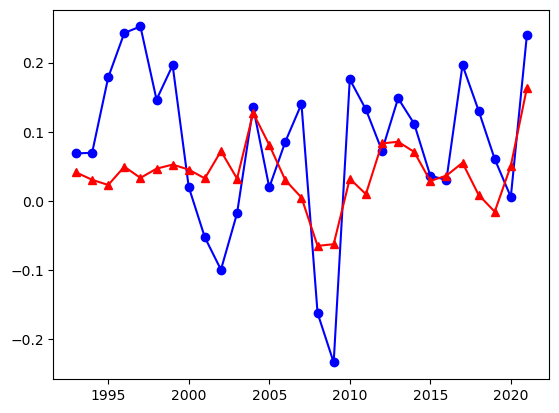

In [23]:
x_axis = djnew['year']
dj = djnew['log_dif_dj']
med = djnew['log_dif_hp']
plt.show()
hpi_handle, = plt.plot(x_axis, dj, marker ='o', color='blue', label="Dow Jones")
# Each point on the cosine chart is marked by a red triangle
med_handle, = plt.plot(x_axis, med, marker='^', color='red', label="House Prices")
plt.show()